<a href="https://colab.research.google.com/github/PraneelUJ/ES335_Prereq_test/blob/main/Praneel_Joshi___23110254_ES335_Prereqtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ Name: Praneel \ Joshi $$
$$ Rollno: 23110254 $$


Q1
 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


Soln: \
 The total multiplications needed are:
$$
n × m × k
$$
This is because when we multiply two matrices of dimension (n×k) and (k×m) we find the dot product of every row of first matrix and first column of 2nd matrix, so the number of products are n×m and there are k such operations so it takes n×m×k total multiplications.
\
\
The total additions needed are :
$$
 n × m × (k - 1)
$$
This is because we need to add k numbers to each other and it takes k-1 additions per vector pair.

Q2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

using python list

In [ ]:
import time
A=[[1,2,3],[4,5,6],[7,8,9]]
B=[[2,4,6],[8,10,12],[1,2,3]]
n=3
m=3
k=3
start=time.time()
C=[[0 for _ in range(m)]for _ in range(n)]
for i in range(n):
  for j in range(m):
    for p in range(k):
      C[i][j]+=A[i][p]*B[p][j]
end=time.time()
print("The time taken to multiply two matrices\n using python list is: ", end-start)



The time taken to multiply two matrices
 using python list is:  0.00021147727966308594


In [ ]:
import numpy as np
npa=np.array(A)
npb=np.array(B)
D=[[0 for _ in range(m)]for _ in range(n)]
npd=np.array(D)
start=time.time()
for i in range(n):
  for j in range(m):
    for p in range(k):
      npd[i][j]+=npa[i][p]*npb[p][j]
end=time.time()
print("The time taken to multiply two matrices\n using python list is: ", end-start)

The time taken to multiply two matrices
 using python list is:  0.0001685619354248047


The multiplication by python numpy arrays is faster than python lists as numpy arrays as compiled C code which is fast.

Q3 Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

This method is similar to bubble sort algorithm in which in the first pass we find the highest number, then 2nd highest and so on. The time complexity of this is
$$ O(N^2) $$
and here is the implementation of bubble sort.

In [ ]:
import time
l=[3,2,5,9,1,0,-1]
n=7
start=time.time()
for i in range(n):
  for j in range(i+1,n):
    if l[i]>l[j]:
      l[i],l[j]=l[j],l[i]
end=time.time()
print(f'The median of the array is {l[n//2]}')
print(f"The time needed to perform the operation is {end-start}")

The median of the array is 2
The time needed to perform the operation is 0.0001232624053955078


A better method can be using the inbuilt sort method of python as it takes a time complexity of $$ O(NlogN) $$
or we can also implement merge sort method whose time complexity is also the same.

In [ ]:
l=[3,2,5,9,1,0,-1]
start=time.time()
l.sort()
end=time.time()
print(f'The median of the array is {l[n//2]}')
print(f"The time needed to perform the operation is {end-start}")

The median of the array is 2
The time needed to perform the operation is 5.221366882324219e-05


In [ ]:
import numpy as np
npl=np.array(l)
start=time.time()
np.median(npl)
end=time.time()
print(f"The time needed for the given operation is {end-start}")

The time needed for the given operation is 0.00021600723266601562


Q4 What is the gradient of the following function with respect to x and y?
 $$ x^2y + y^3sin(x) $$

$The \ gradient \ of $
$$f = x^2y + y^3sin(x) $$ $with \ respect \ to \ x \ is $
$$ 2xy+y^3cosx$$

$The \ gradient \ of $
$$f = x^2y + y^3sin(x) $$ $with \ respect \ to \ y \ is $
$$ x^2 + 3y^2sin(x)$$

Q5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [ ]:
import numpy as np
import jax.numpy as jnp
from jax import grad

def jaxgrad(x, y):
    return (x * x * y) + (y * y * y) * jnp.sin(x)

def gradf(x, y):
    delx = (2 * x * y) + (y * y * y * jnp.cos(x))
    dely = (x * x) + (3 * y * y * jnp.sin(x))
    return delx, dely

f = grad(jaxgrad, argnums=(0, 1))  # returns (df/dx, df/dy)




Case 1 : x=1, y=0.5
Output by JAX : (df/dx, df/dy) = (1.067537784576416, 1.631103277206421)
Analytic       : (df/dx, df/dy) = (1.067537784576416, 1.631103277206421)


In [ ]:
print("Case 1 : x=1, y=0.5")
jaxx, jaxy = f(1.0, 0.5)
dx, dy = gradf(1.0, 0.5)
print(f"Gradient by JAX     = ({jaxx}, {jaxy})")
print(f"Gradient by gradf   = ({dx}, {dy})")
print("-------------------------------")
print("Case 2 : x=10, y=100.5")
jaxx, jaxy = f(10.0, 100.5)
dx, dy = gradf(10.0, 100.5)
print(f"Gradient by JAX     = ({jaxx}, {jaxy})")
print(f"Gradient by gradf   = ({dx}, {dy})")

Case 1 : x=1, y=0.5
Gradient by JAX     = (1.067537784576416, 1.631103277206421)
Gradient by gradf   = (1.067537784576416, 1.631103277206421)
-------------------------------
Case 2 : x=10, y=100.5
Gradient by JAX     = (-849710.625, -16384.24609375)
Gradient by gradf   = (-849710.625, -16384.248046875)


Q6 Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp
x,y = sp.symbols("x y")
sp.init_printing()
f=(x**2)*y + (y**3)*(sp.sin(x))


In [ ]:
print(f"Function before finding gradient is")
display(f)
print("Gradient wrt to x")
display(sp.diff(f,x))
print("Gradient wrt to y")
display(sp.diff(f,y))

Function before finding gradient is


 2      3       
x ⋅y + y ⋅sin(x)

Gradient wrt to x


         3       
2⋅x⋅y + y ⋅cos(x)

Gradient wrt to y


 2      2       
x  + 3⋅y ⋅sin(x)

This confirms that the gradient calculated manually and by JAX and sympy are the same

Q7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.

In [ ]:
mydata={2022:{},2023:{},2024:{},2025:{}}
for i in mydata:
  mydata[i]={"Branch 1":{},"Branch 2":{}}
  for branch in mydata[i]:
    for j in range(1,15):
      mydata[i][branch][j]={"ROllno":j,"Name":None,"Marks":{"Maths":None,"Science":None,"English":None}}


In [ ]:
mydata[2022]["Branch 1"][1]["Name"]="John"
mydata[2022]["Branch 1"][1]["Marks"]={"Maths":97,"Science":98,"English":95}

In [ ]:
print(mydata[2022]["Branch 1"][1])

{'ROllno': 1, 'Name': 'John', 'Marks': {'Maths': 97, 'Science': 98, 'English': 95}}


Q8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [5]:
import numpy as np

class Student:
    def __init__(self, rollno, name, math=None, science=None, english=None):
        self.rollno = rollno
        self.name = name
        self.math = math
        self.science = science
        self.english = english

    def printdetails(self):
        print(f"Rollno: {self.rollno}")
        print(f"Name: {self.name}")
        print(f"Maths: {self.math}")
        print(f"Science: {self.science}")
        print(f"English: {self.english}")

class Branch:
    def __init__(self, branch, student_list):
        self.branch = branch
        self.student_list = student_list

class Year:
    def __init__(self, year, branch_list):
        self.year = year
        self.branch_list = branch_list

class Database:
    def __init__(self, year_list):
        self.year = year_list




In [7]:
data = Database([
    Year(2020, []), Year(2021, []), Year(2022, []),
    Year(2023, []), Year(2024, []), Year(2025, [])
])

for y in data.year:
    y.branch_list = [Branch(1, []), Branch(2, [])]
    for branch in y.branch_list:
        branch.student_list = [
            Student(rollno, f"Name {rollno}", np.random.randint(10,101), np.random.randint(10,101), np.random.randint(10,101))
            for rollno in range(1, 11)
        ]


In [9]:
data.year[1].branch_list[1].student_list[2].printdetails()

Rollno: 3
Name: Name 3
Maths: 88
Science: 80
English: 11


Q9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

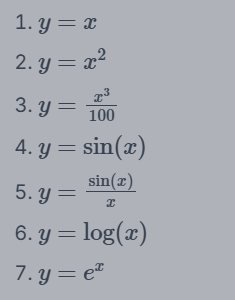

In [ ]:
x = np.arange(0.5, 100.5, 0.5)

1. $$ y=x$$

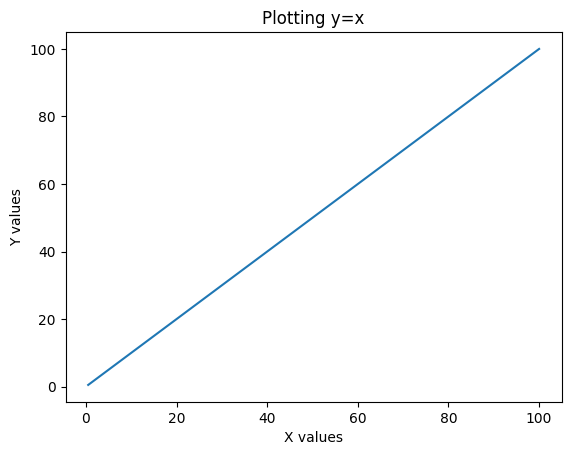

In [ ]:
import matplotlib.pyplot as plt
y=x
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plotting y=x")
plt.show()

2. $$y=x^2$$

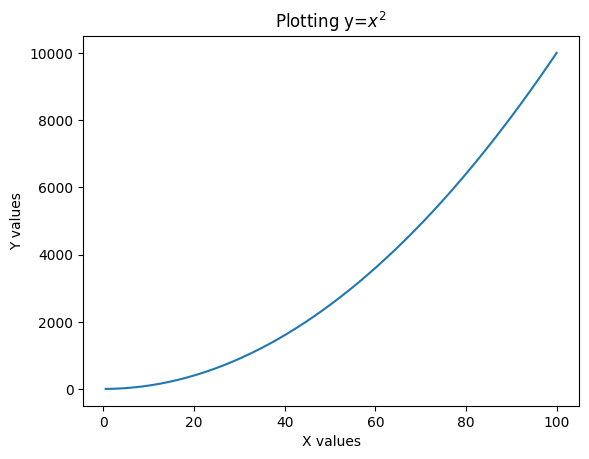

In [ ]:
y=x**2
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plotting y=$x^2$")
plt.show()


3. $$y=x^3/100$$

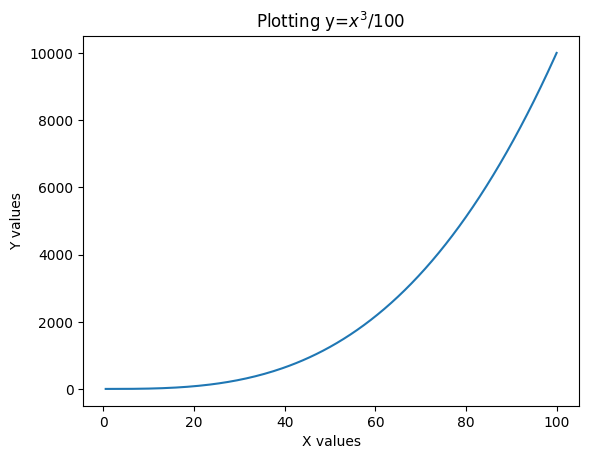

In [ ]:
y=(x**3)/100
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plotting y=$x^3/100$")
plt.show()

4. $$y=sin(x)$$

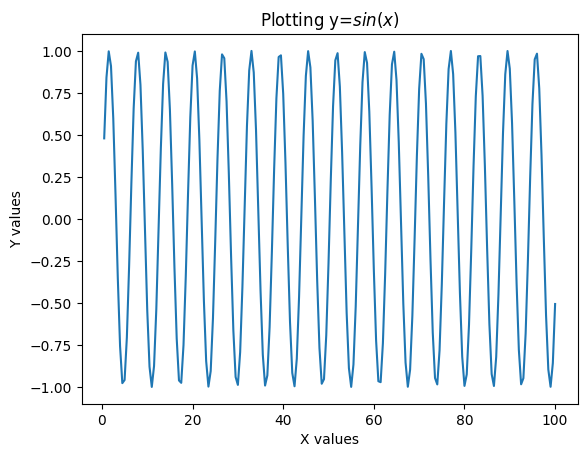

In [ ]:
y=np.sin(x)
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plotting y=$sin(x)$")
plt.show()

5. $$y=sin(x)/x$$

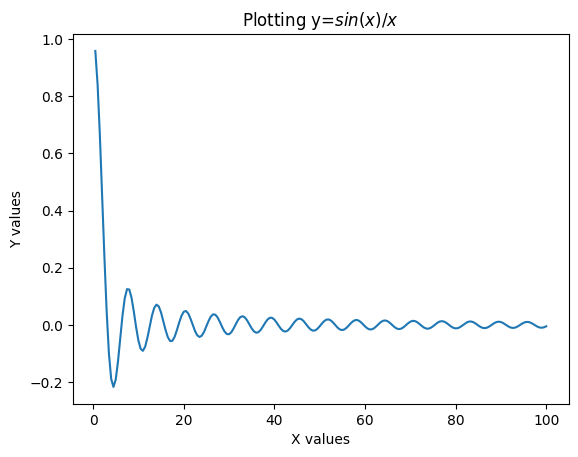

In [ ]:
y=np.sin(x)/x
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plotting y=$sin(x)/x$")
plt.show()

6. $$y=log(x)$$

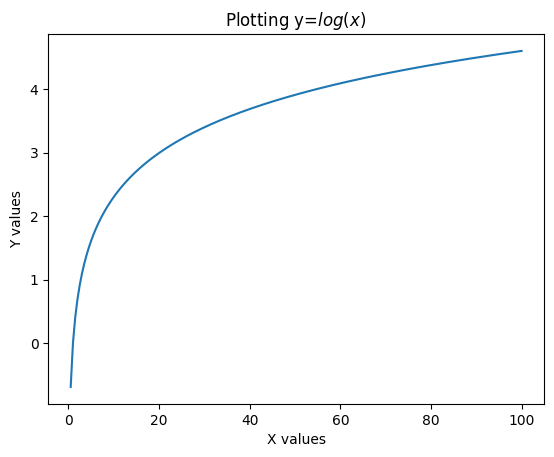

In [ ]:
y=np.log(x)
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plotting y=$log(x)$")
plt.show()

7. $$y=e^x$$

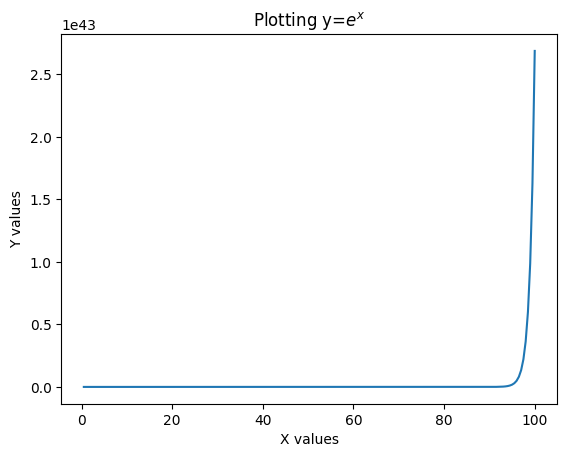

In [ ]:
y=np.exp(x)
plt.plot(x,y)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Plotting y=$e^x$")
plt.show()

Q10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [10]:
import pandas as pd
import numpy as np

In [15]:
matrix=np.random.randint(1,20,(20,5))
df=pd.DataFrame(matrix)
df.rename(columns={0:'a',1:'b',2:'c',3:'d',4:'e'},inplace=True)
cols=df.columns
a = [np.std(np.array(df[cols[i]])) for i in range(len(cols))]
mean = np.array(df.mean(axis=1))
print(f"The column with maximum std is: {cols[np.argmax(a)]}, with a std of: {np.max(a)}")
print(f"The row with the minimum mean is {np.argmin(mean)}, with a mean of {min(mean)}")

The column with maximum std is: d, with a std of: 6.147153812944654
The row with the minimum mean is 17, with a mean of 3.8


Q11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [16]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']


In [17]:
def fun(n):
  if n<8:
    return "LT8"
  else:
    return "GT8"
df['g']=df['f'].apply(fun)
df

,a,b,c,d,e,f,g
0,9,19,10,1,3,42,GT8
1,2,12,3,5,4,26,GT8
2,12,17,6,7,1,43,GT8
3,12,12,11,13,6,54,GT8
4,5,6,12,15,7,45,GT8
5,15,9,13,18,18,73,GT8
6,6,17,14,10,17,64,GT8
7,19,3,17,10,4,53,GT8
8,15,1,5,6,3,30,GT8
9,19,17,6,1,15,58,GT8


In [19]:
std = np.std(np.array(df['f']))

np.float64(14.402343559296174)

Q12 Write a small piece of code to explain broadcasting in numpy.

Broadcasting is a method in which 2 different type of arrays can be added to each other. For eg, we take an array [10,12,1,5] and [[1],[2],[10],[100]] they first get converted to 2d arrays like [[10,10,10,10],[12,12,12,12],[1,1,1,1],[5,5,5,5]] and [[1,1,1,1],[2,2,2,2],[10,10,10,10],[100,100,100,100]]  and then get added

In [20]:
import numpy as np

In [21]:
a=np.array([10,12,1,5])
b=np.array([[1],[2],[10],[100]])
print(a+b)

[[ 11  13   2   6]
 [ 12  14   3   7]
 [ 20  22  11  15]
 [110 112 101 105]]


Q13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [22]:
def funargmin(l):
  flat=l.flatten()
  mn=flat[0]
  argmin=0
  for i in range(1,len(flat)):
    if flat[i]<mn:
      mn=flat[i]
      argmin=i
  return argmin

In [24]:
arr=np.array([2,3,10,-10,100,100])
print(funargmin(arr))
print(np.argmin(arr))

3
3
